## Import Libraries

In [14]:
import pandas as pd
from nltk.corpus import stopwords

import nlt
k
nltk.downlo"stopwords"d
s')
stop_words = stopwords.words('englis
h')
import stng


import nltk
nltk.download('wordnet')
nltk.download('stpwords')


import seaborn as sns
import matplotlibpyplot as plt


SyntaxError: invalid syntax (<ipython-input-14-bb82c62278a2>, line 6)

## Import Data

In [ ]:
 
xl = pd.ExcelFile('data/tweets_data.xlsx')
 
xl.sheet_names

['raw tweets', 'Clean tweets']

In [ ]:
db = xl.parse( 'Clean tweets')

In [ ]:
db.shape

(619203, 8)

## View Data

In [ ]:
db.sample(3)

date  ...                                  link_to_the_tweet
336935 2020-05-31 12:06:01  ...  https://twitter.com/PGVRR/status/1267064790884...
381514 2020-04-25 16:56:06  ...  https://twitter.com/GizmoAsm/status/1254091827...
88415  2020-04-23 13:39:19  ...  https://twitter.com/SonAdetola/status/12533175...

[3 rows x 8 columns]

## Determine Null Tweets

In [ ]:
db.isnull().sum()

date                      0
tweet                 32471
retweets                  0
favorites                 0
replies                   0
hashtags             410742
country                   0
link_to_the_tweet         0
dtype: int64

## Remove Null Tweets

In [ ]:
data = db[db['tweet'].notna()]
data.isnull().sum()

date                      0
tweet                     0
retweets                  0
favorites                 0
replies                   0
hashtags             410525
country                   0
link_to_the_tweet         0
dtype: int64

## Preprocess Text

In [ ]:


#removing punctuations,stop words, and converting the headlines to lower case
def preprocess(text):
   
    headlines = [headline for headline in text.lower() if headline not in string.punctuation ]
    new_headlines = ''.join(headlines)
    new_headlines = [new_headline for new_headline in new_headlines.split() if      new_headline not in stop_words]
  
    
    return ' '.join(new_headlines)

In [ ]:
data['preprocessed'] = data['tweet'].apply(preprocess)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

data['preprocessed']= data['preprocessed'].astype(str)
import re # regex - regular epression
#data['original_content'] = data['content']

#remove hashtag in content
def Remove_Hashtag(text, pattern_regex):
    #print(text)
    text = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text 
data['preprocessed'] = np.vectorize(Remove_Hashtag)(data['preprocessed'], "#[\w]*")



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#remove http
no_link_tweets = []
for index, row in data.iterrows():
    
    link_removed_text = [word for word in row.preprocessed.split() if 'http' not in word]
    no_link_tweets.append(' '.join(link_removed_text)) 

data['preprocessed'] = no_link_tweets

#twitter.com
no_link_tweets = []
for index, row in data.iterrows():
    link_removed_text = [word for word in row.preprocessed.split() if 'twitter.com' not in word]
    no_link_tweets.append(' '.join(link_removed_text)) 
data['preprocessed'] = no_link_tweets



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
#remove mentions
def remove_atname(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text 

data['preprocessed'] = np.vectorize(remove_atname)(data['preprocessed'], "@[\w]*")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:


#Making all letters lowercase
data['preprocessed'] = data['preprocessed'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing Punctuation, Symbols
data['preprocessed'] = data['preprocessed'].str.replace('[^\w\s]',' ')

#Removing Stop Words using NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['preprocessed'] = data['preprocessed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Sentiment Analysis

VANDER SENTIMENT

In [ ]:
pip install vaderSentiment

Initiate vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Determine the actual sentiment

In [ ]:
%%time

def vanderSentiment2(sentence):
  ana = analyser.polarity_scores(sentence)
  if ana['compound'] > 0.001:
    score = 1
  elif ana['compound'] < -0.001:
    score = -1
  else:
    score = 0
  #scores.append(score)

  if score == 1:
    if ana['pos'] >= 0.5:
      pol = 2
      clas = 'Highly Positive'
    else:
      pol = 1
      clas = 'Positive'
  elif score == -1:
    if ana['neg'] >= 0.5:
      pol = -2
      clas = 'Highly Negative'
    else:
      pol = -1
      clas = 'Negative'
  else:
    pol = 0
    clas = 'Neutral'
  #polarity.append(pol)
  return score, pol, clas,ana['compound']

data['score'], data['vander_polarity'], data['van_pol_class'], data['vander_compund'] = zip(*data['preprocessed'].apply(vanderSentiment2))



CPU times: user 50.4 s, sys: 117 ms, total: 50.5 s
Wall time: 50.6 s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv("data/sentiment_data.csv")

In [ ]:
data['van_pol_class'].value_counts(sort=True)

Neutral            254033
Positive           185799
Negative           108939
Highly Positive     26007
Highly Negative     11954
Name: van_pol_class, dtype: int64

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

Vader Compound Score Distribution

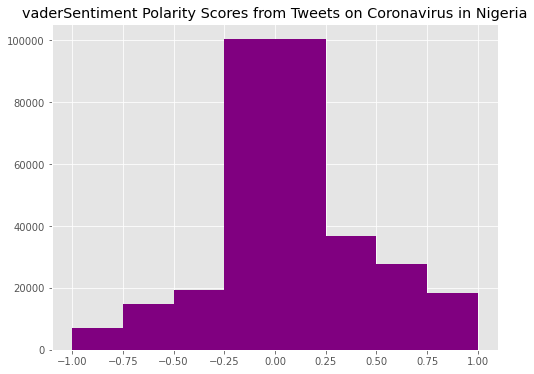

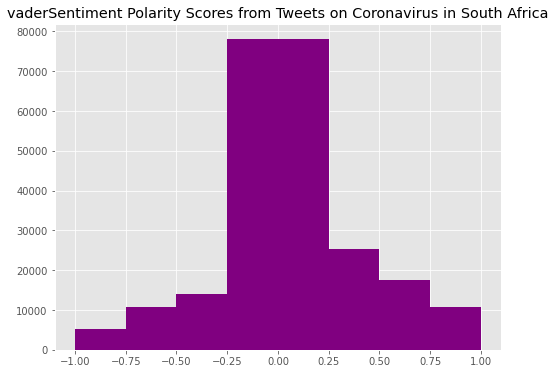

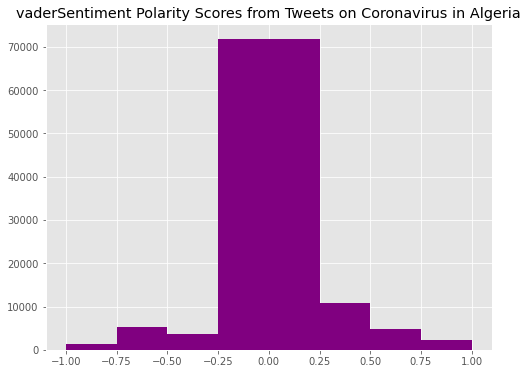

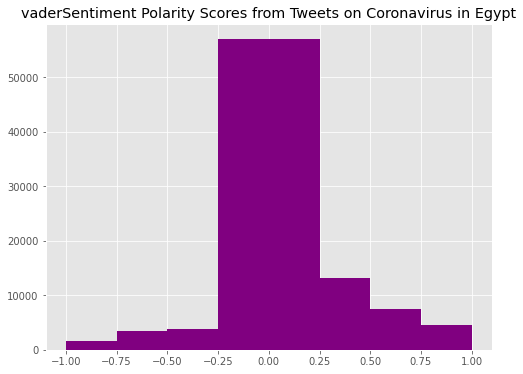

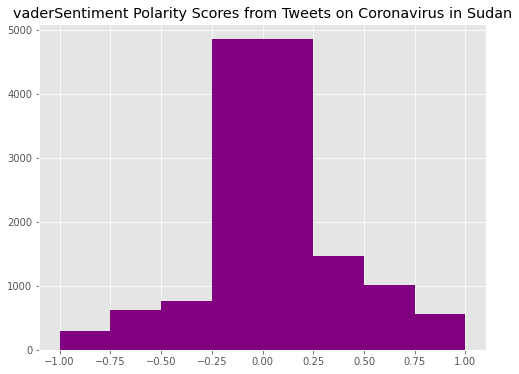

In [ ]:
countries = data['country'].unique()
for country in countries:
  fig, ax = plt.subplots(figsize=(8, 6))
  data[data['country']== country]['vander_compund'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")
  plt.title("vaderSentiment Polarity Scores from Tweets on Coronavirus in {}".format(country))
  plt.show()



Vader Polarity Class Distribution by Country

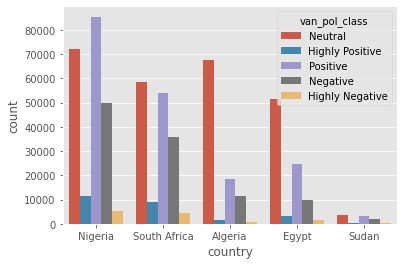

In [ ]:
sns.countplot(x='country',hue ='van_pol_class',data=data)

Distribution of Emotions in each country

Nigeria
Positive           85472
Neutral            72300
Negative           49963
Highly Positive    11554
Highly Negative     5104
Name: van_pol_class, dtype: int64
South Africa
Neutral            58645
Positive           54155
Negative           35685
Highly Positive     9137
Highly Negative     4298
Name: van_pol_class, dtype: int64
Algeria
Neutral            67673
Positive           18319
Negative           11328
Highly Positive     1567
Highly Negative      786
Name: van_pol_class, dtype: int64
Egypt
Neutral            51664
Positive           24732
Negative           10014
Highly Positive     3303
Highly Negative     1481
Name: van_pol_class, dtype: int64
Sudan
Neutral            3751
Positive           3121
Negative           1949
Highly Positive     446
Highly Negative     285
Name: van_pol_class, dtype: int64


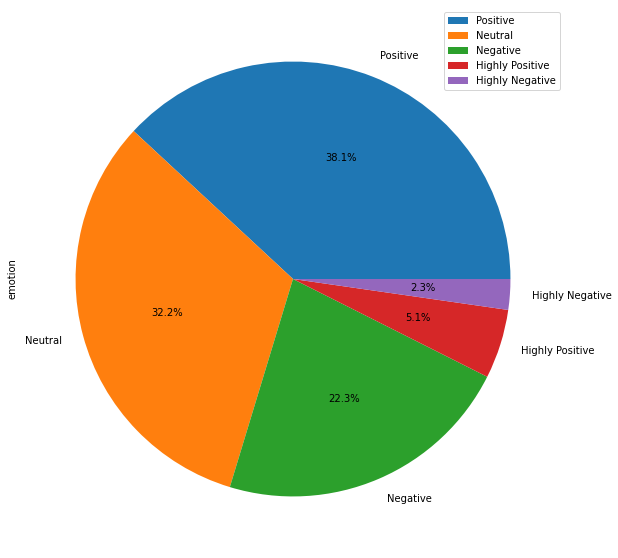

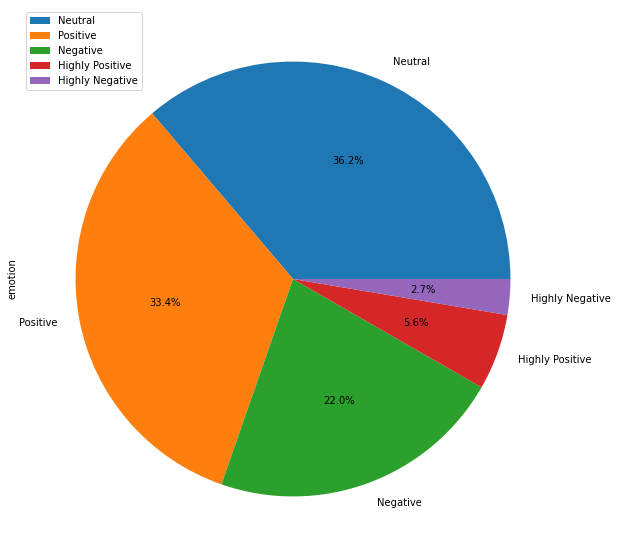

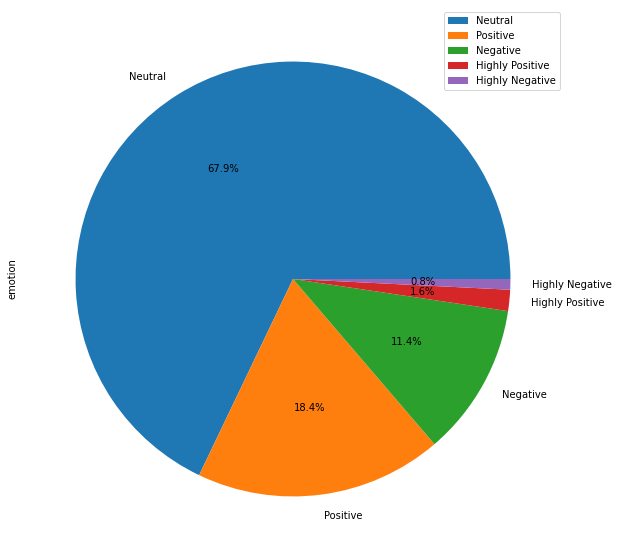

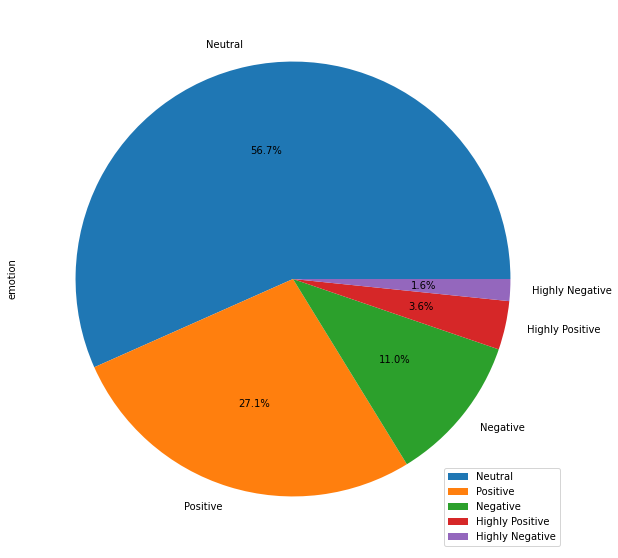

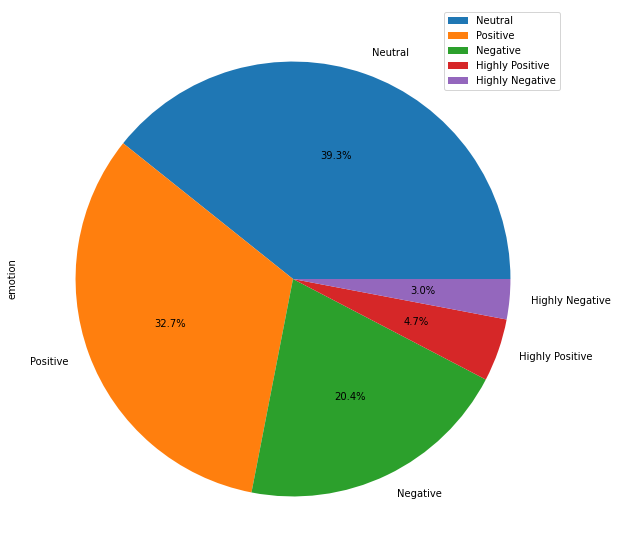

In [ ]:
countries = data['country'].unique()
for country in countries:
  print(country)
  c = data[data['country']== country]
  type_counts = c['van_pol_class'].value_counts(sort=True)
  df2 = pd.DataFrame({'emotion': type_counts})
  print(type_counts)
  #print(c.sample(1))
  df2.plot.pie(y='emotion', figsize=(10,10), autopct='%1.1f%%')

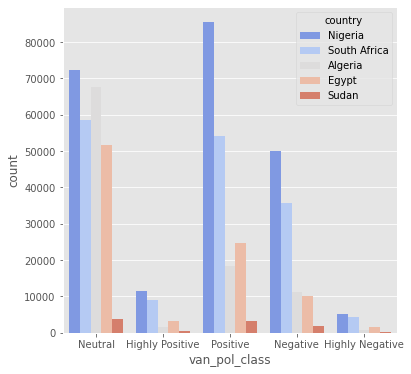

In [ ]:
plt.figure(figsize=(6,6))

sns.countplot(x='van_pol_class',hue=data['country'],data=data,palette='coolwarm')
             #hue_order=['neutral','positive','negative'])

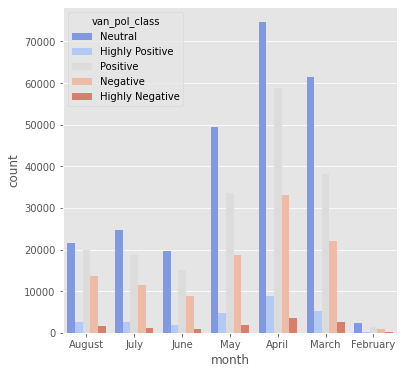

In [ ]:
plt.figure(figsize=(6,6))

sns.countplot(x='van_pol_class',hue=data['month'],data=data,palette='coolwarm')
             #hue_order=['neutral','positive','negative'])

# WORD CLOUD

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


Word cloud for each emotion type in  each Country

there are 4108174 tags in Neutral tweets of Nigeria


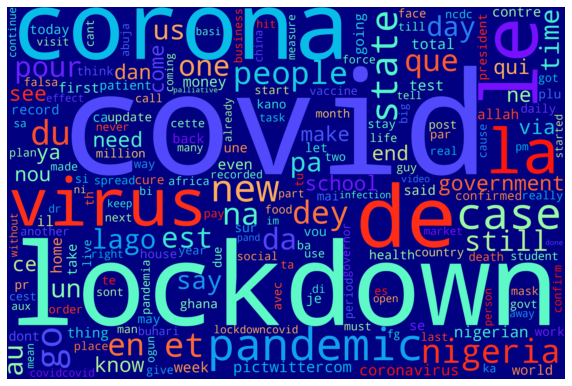

there are 609919 tags in Highly Positive tweets of Nigeria


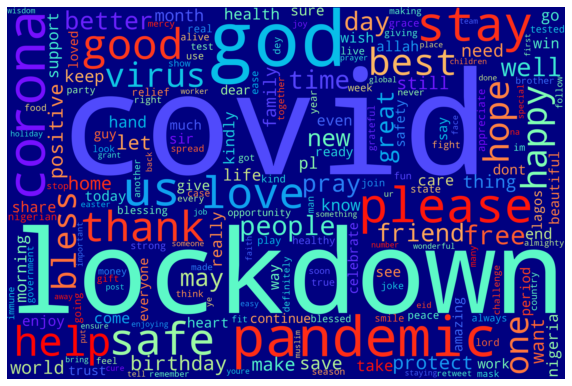

there are 9242745 tags in Positive tweets of Nigeria


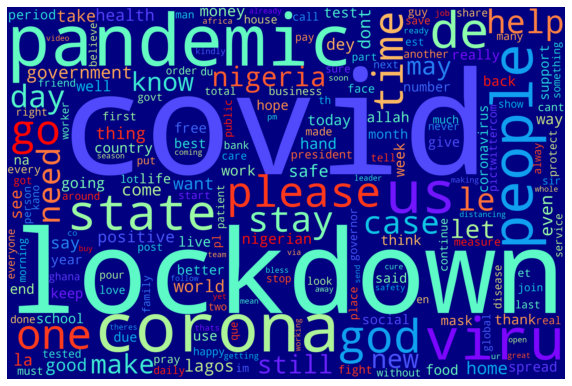

there are 5264778 tags in Negative tweets of Nigeria


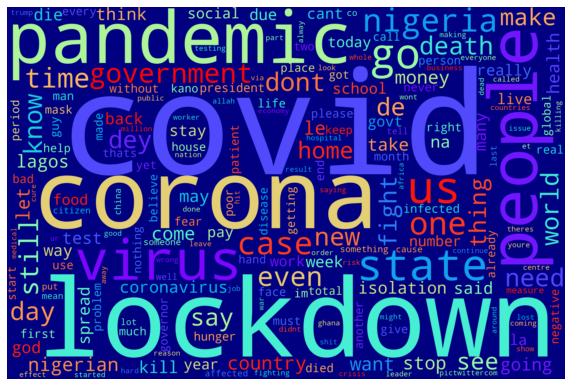

there are 216414 tags in Highly Negative tweets of Nigeria


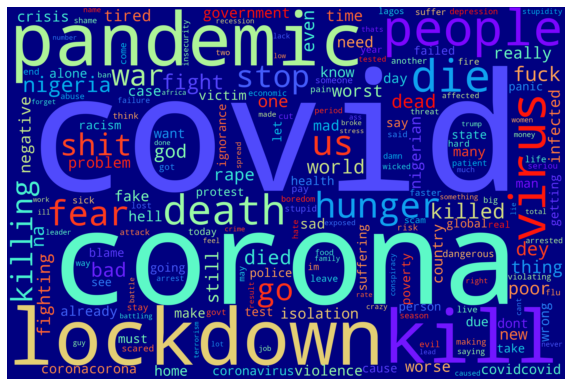

there are 5351451 tags in Positive tweets of South Africa


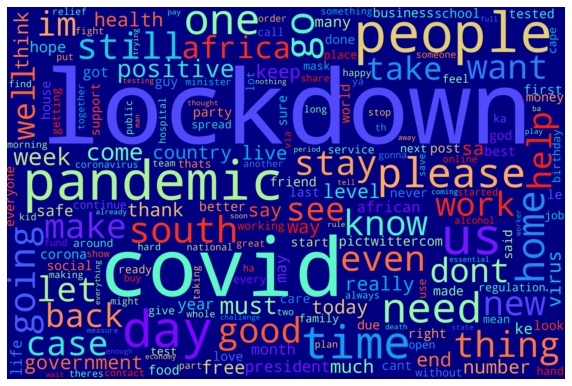

there are 3572161 tags in Negative tweets of South Africa


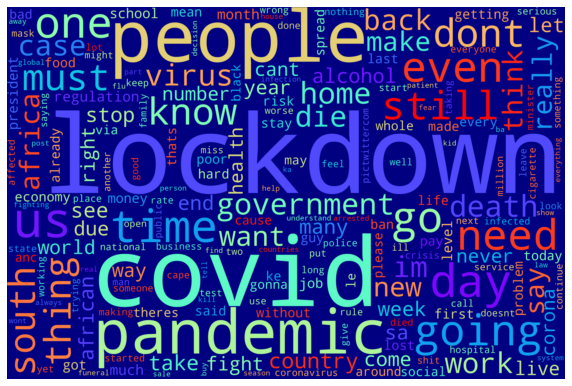

there are 2845352 tags in Neutral tweets of South Africa


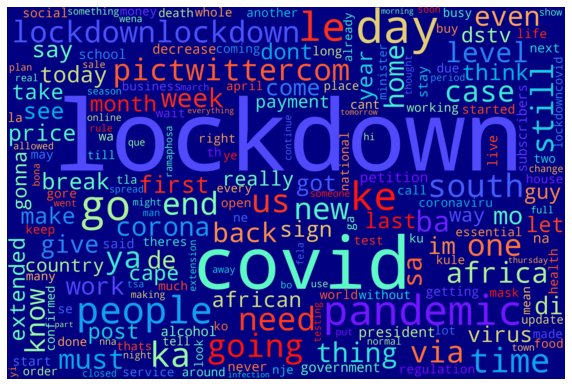

there are 442061 tags in Highly Positive tweets of South Africa


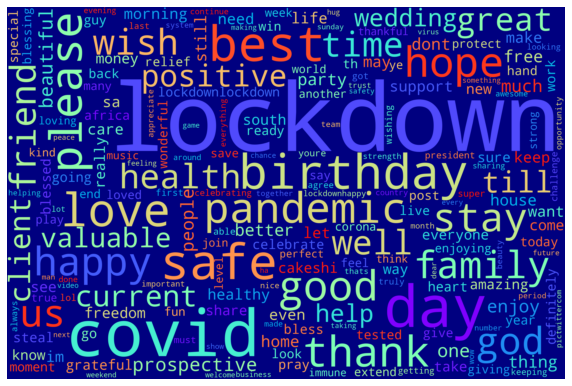

there are 180559 tags in Highly Negative tweets of South Africa


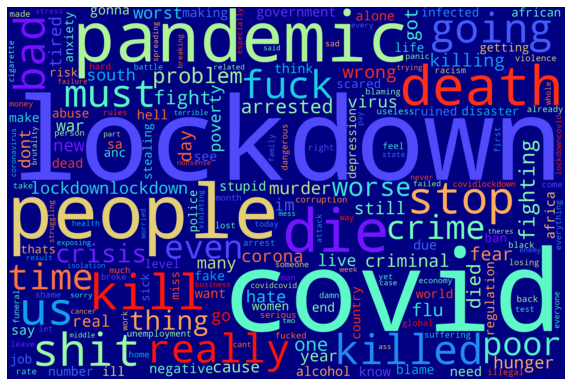

there are 6256212 tags in Neutral tweets of Algeria


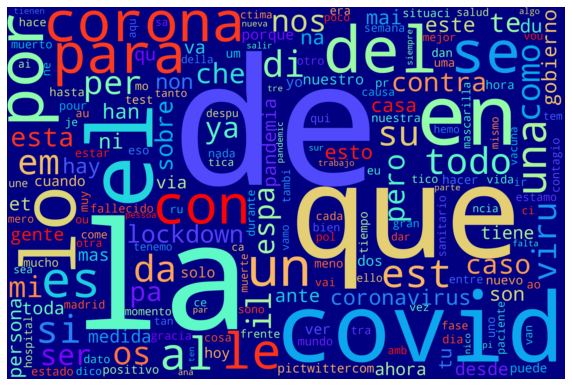

there are 1551023 tags in Negative tweets of Algeria


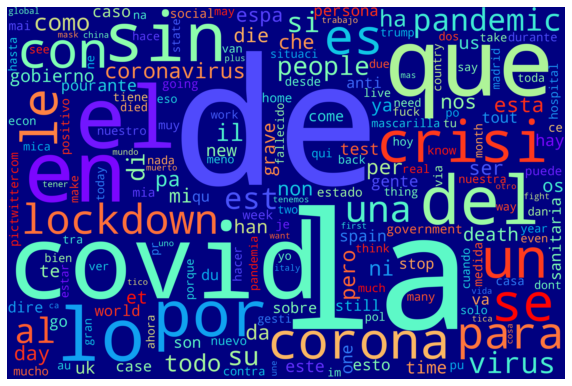

there are 68717 tags in Highly Positive tweets of Algeria


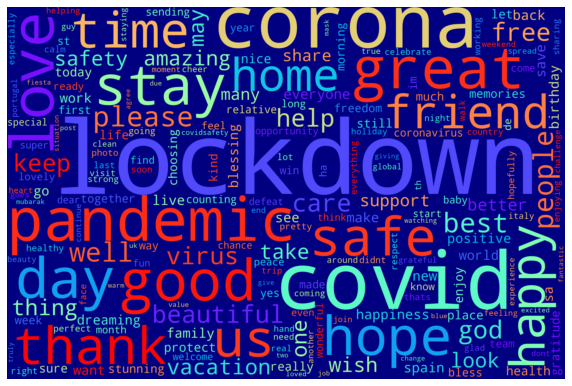

there are 2467344 tags in Positive tweets of Algeria


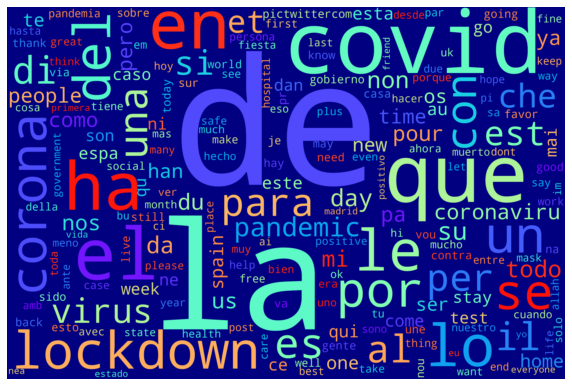

there are 29091 tags in Highly Negative tweets of Algeria


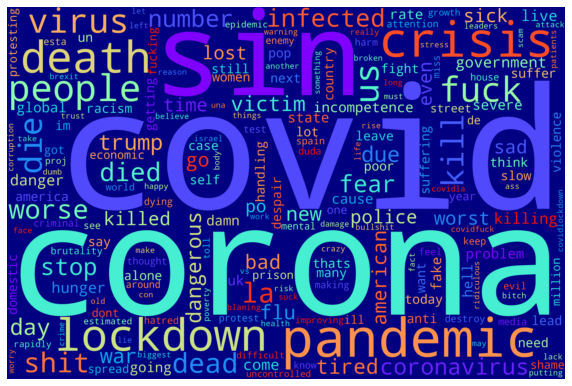

there are 2937041 tags in Positive tweets of Egypt


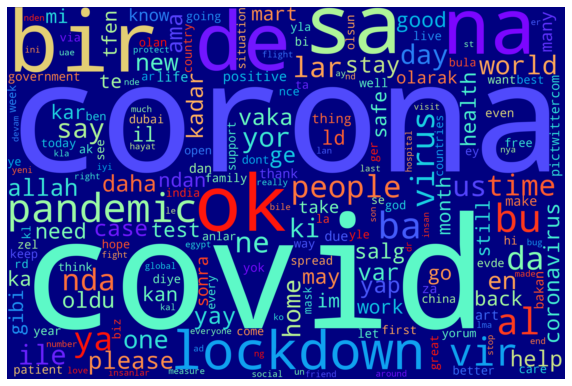

there are 3007597 tags in Neutral tweets of Egypt


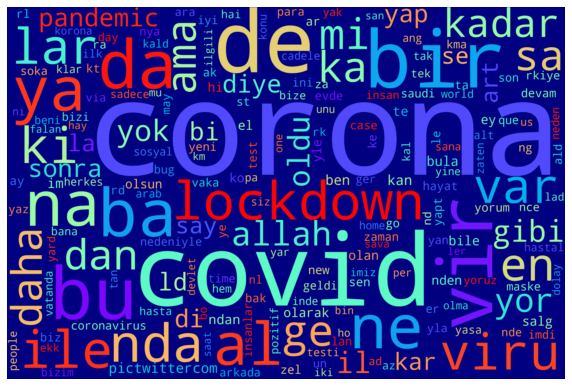

there are 1094556 tags in Negative tweets of Egypt


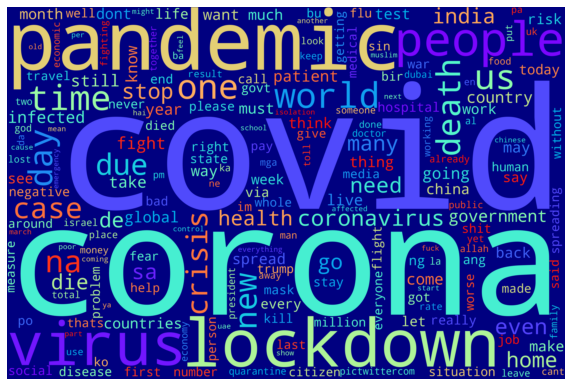

there are 165976 tags in Highly Positive tweets of Egypt


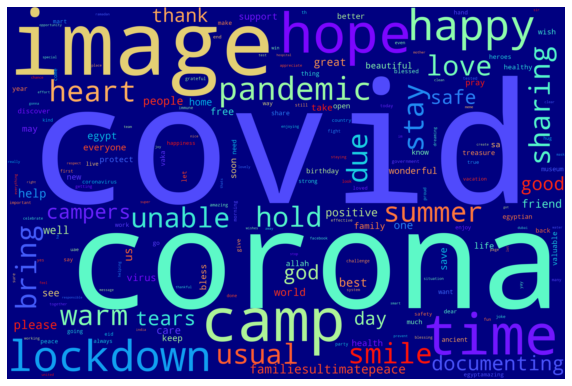

there are 55043 tags in Highly Negative tweets of Egypt


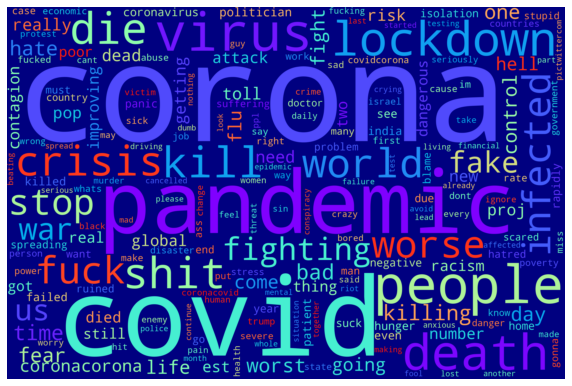

there are 203841 tags in Neutral tweets of Sudan


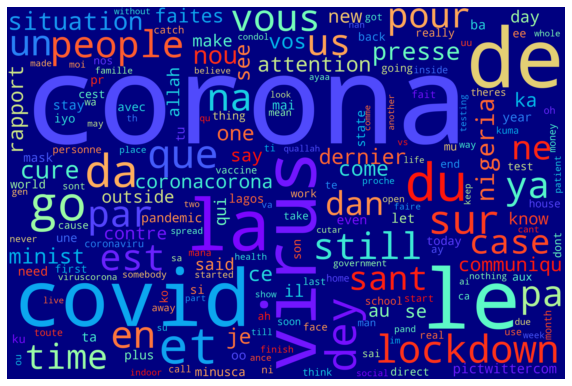

there are 307317 tags in Positive tweets of Sudan


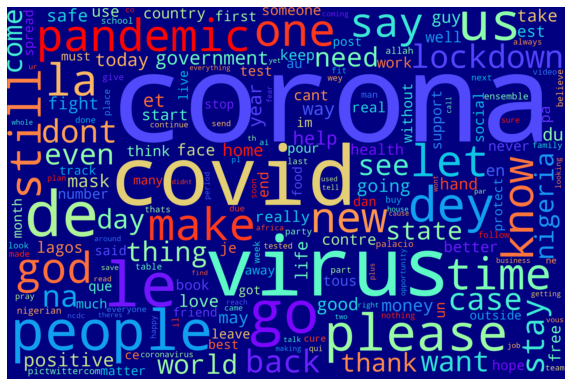

there are 19775 tags in Highly Positive tweets of Sudan


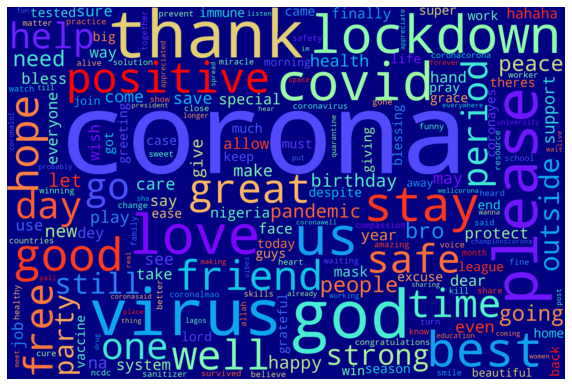

there are 185693 tags in Negative tweets of Sudan


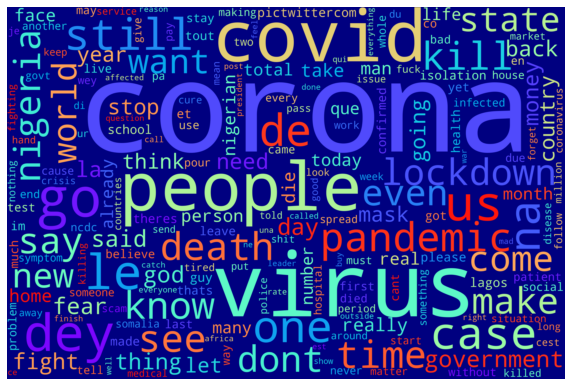

there are 11541 tags in Highly Negative tweets of Sudan


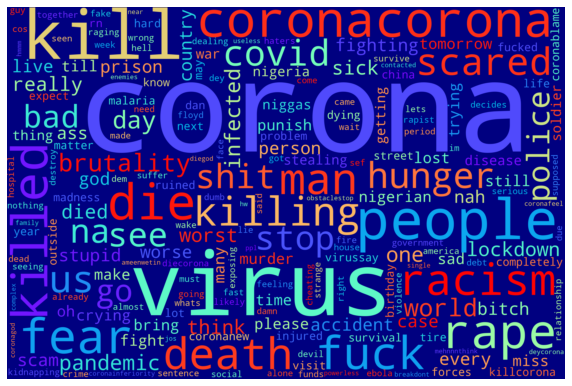

In [ ]:
countries = data['country'].unique()
for country in countries:
  #print(country)
  c = data[data['country']== country]
  senti_classes = c['van_pol_class'].unique()
  for sen_class in senti_classes:
    #custom_mask = np.array(Image.open("nigeria.png"))
    #wc = WordCloud(background_color="white", mask=custom_mask)
    #mask = np.array(Image.open('nigeria.png'))
    """
    wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
                """
    
    sen_data = c[c['van_pol_class']== sen_class]['preprocessed']
    tagss = ''.join(tag for tag in sen_data)
    print('there are {} tags in {} tweets of {}'.format(len(tagss), sen_class, country))
    plt.subplots(figsize=(10, 10))
    wc = wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='navy', colormap='rainbow',
                               collocations=False, stopwords = STOPWORDS).generate(tagss)
    #WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
                   #collocations=False).generate(tagss)
    #plot_cloud(wordcloud)
    
    #wc.generate(tagss)
    #image_colors = ImageColorGenerator(custom_mask)
    #wc.recolor(color_func=image_colors)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()





Tweet Count per month in each country based per sentiment

Neutral IS PROCESSED BELOW
Highly Positive IS PROCESSED BELOW
Positive IS PROCESSED BELOW
Negative IS PROCESSED BELOW
Highly Negative IS PROCESSED BELOW


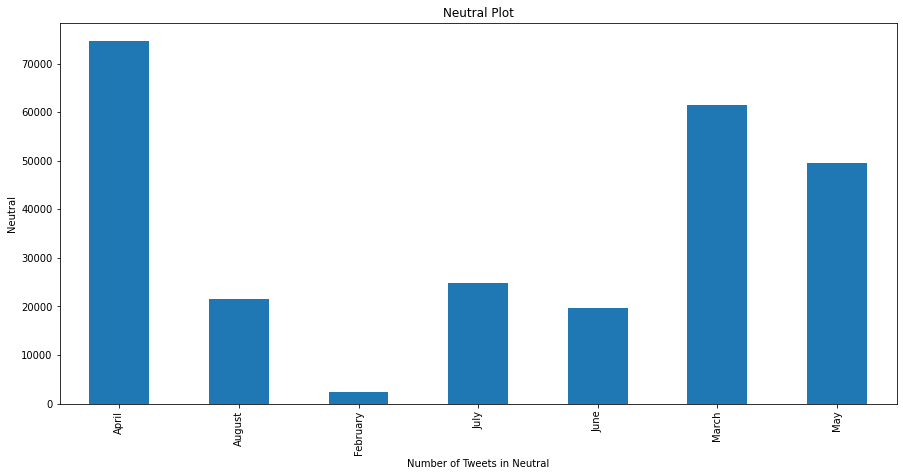

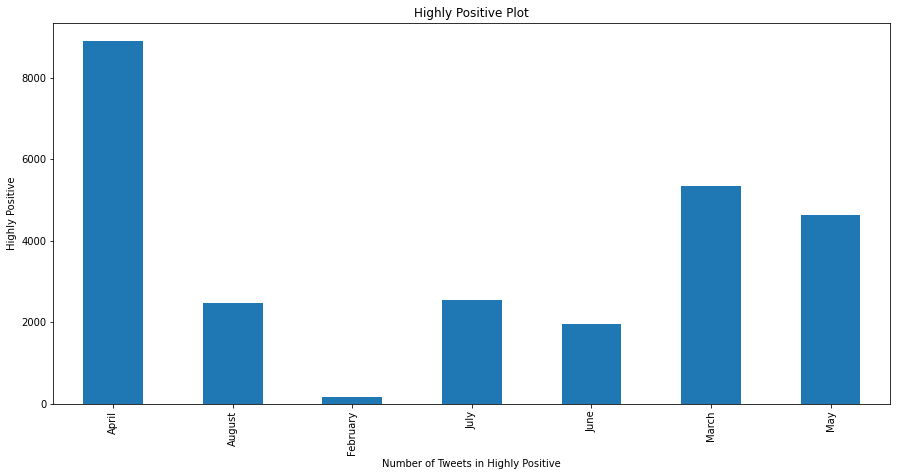

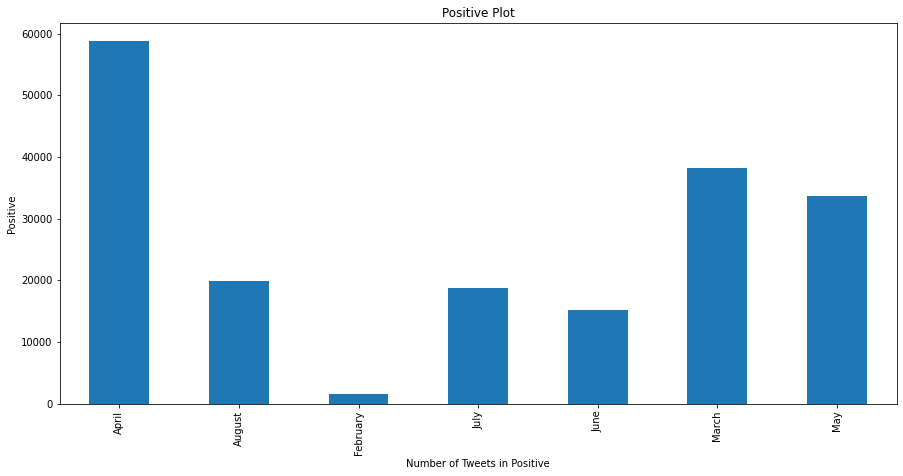

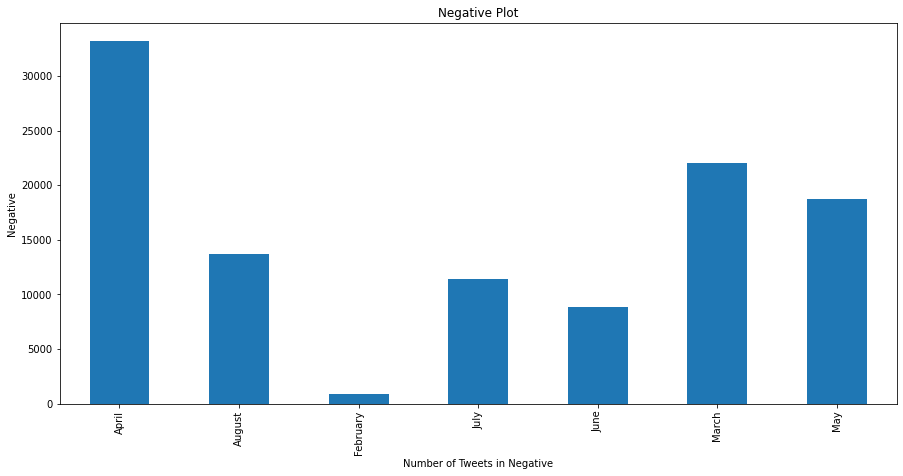

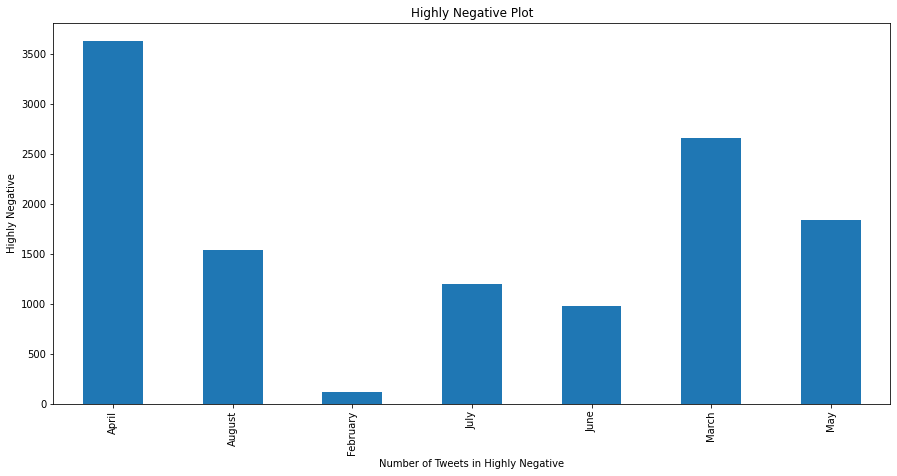

In [ ]:
states = data['van_pol_class'].unique()
for state in states:
  print("{} IS PROCESSED BELOW".format(state))
  fig, ax = plt.subplots(figsize=(15,7))
  ax.title.set_text('{} Plot'.format(state))
  ax.set_xlabel("Number of Tweets in {}".format(state))
  ax.set_ylabel("{}".format(state))
  lagos = data[data['van_pol_class']== state]
  lagos['month'].value_counts(sort=True).sort_index().plot(kind='barh')
 
  

Tweet Distribution per month in each of the Countries

Nigeria IS PROCESSED BELOW
South Africa IS PROCESSED BELOW
Algeria IS PROCESSED BELOW
Egypt IS PROCESSED BELOW
Sudan IS PROCESSED BELOW


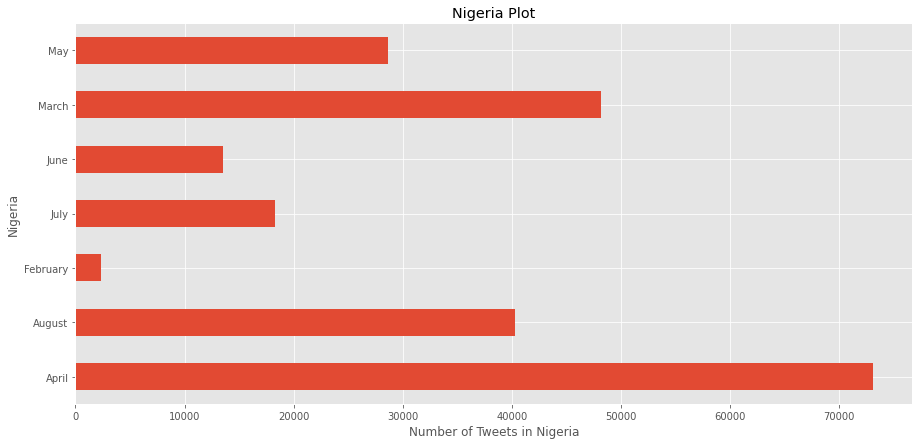

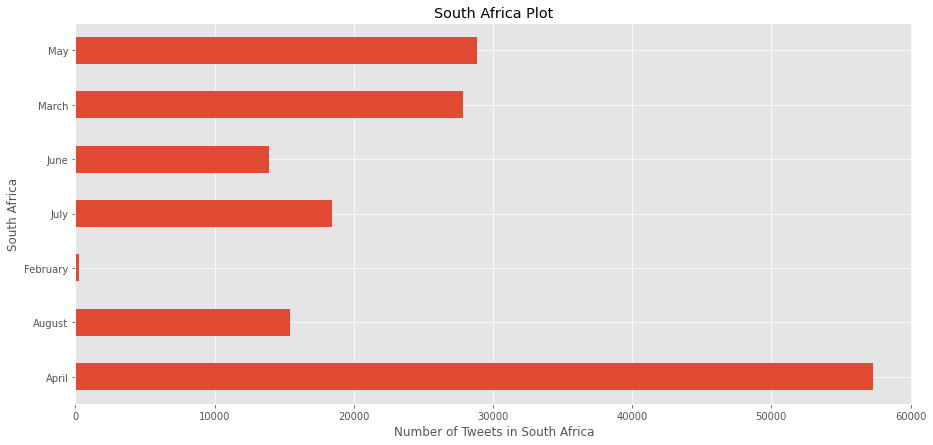

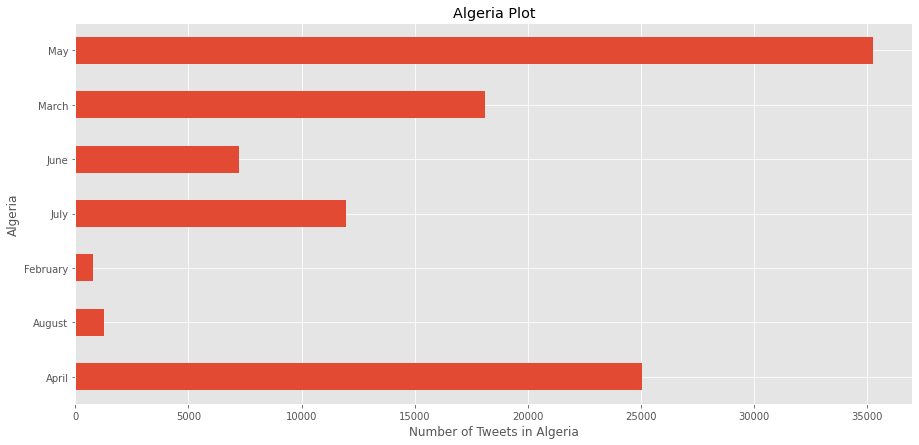

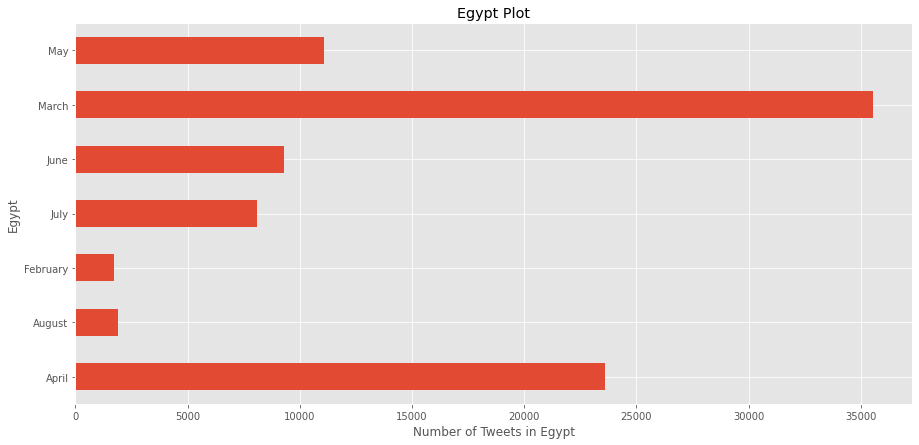

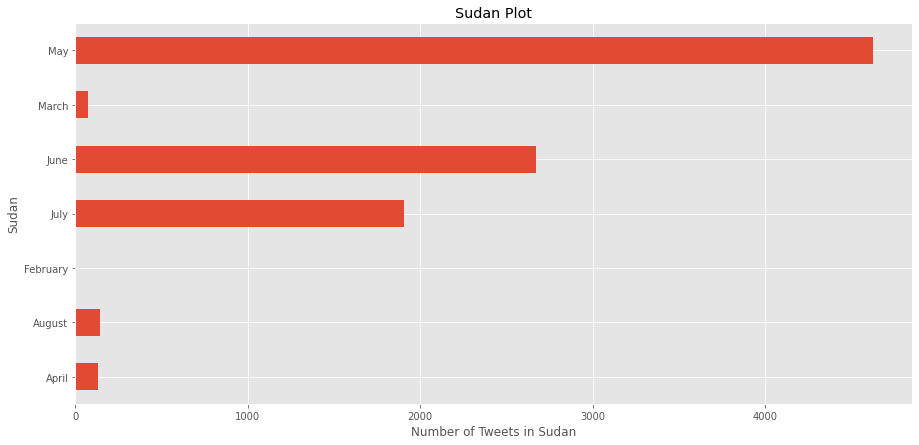

In [ ]:
states = data['country'].unique()
for state in states:
  print("{} IS PROCESSED BELOW".format(state))
  fig, ax = plt.subplots(figsize=(15,7))
  ax.title.set_text('{} Plot'.format(state))
  ax.set_xlabel("Number of Tweets in {}".format(state))
  ax.set_ylabel("{}".format(state))
  lagos = data[data['country']== state]
  lagos['month'].value_counts(sort=True).sort_index().plot(kind='barh')
 
  

In [ ]:
states = data['country'].unique()
for state in states:
  print("Number of Tweets from {} IS PROCESSED BELOW".format(state))
  
  lagos = data[data['country']== state]
  print(lagos['month'].value_counts(sort=True).sort_index())
  print("\n")

Number of Tweets from Nigeria IS PROCESSED BELOW
April       73072
August      40299
February     2338
July        18333
June        13482
March       48213
May         28656
Name: month, dtype: int64


Number of Tweets from South Africa IS PROCESSED BELOW
April       57274
August      15451
February      228
July        18411
June        13880
March       27833
May         28843
Name: month, dtype: int64


Number of Tweets from Algeria IS PROCESSED BELOW
April       25078
August       1244
February      756
July        11985
June         7254
March       18096
May         35260
Name: month, dtype: int64


Number of Tweets from Egypt IS PROCESSED BELOW
April       23584
August       1899
February     1717
July         8091
June         9309
March       35531
May         11063
Name: month, dtype: int64


Number of Tweets from Sudan IS PROCESSED BELOW
April        131
August       143
February       3
July        1905
June        2674
March         72
May         4624
Name: month, dtype:

Distribution of each country per sentiment

Nigeria plot 
South Africa plot 
Algeria plot 
Egypt plot 
Sudan plot 


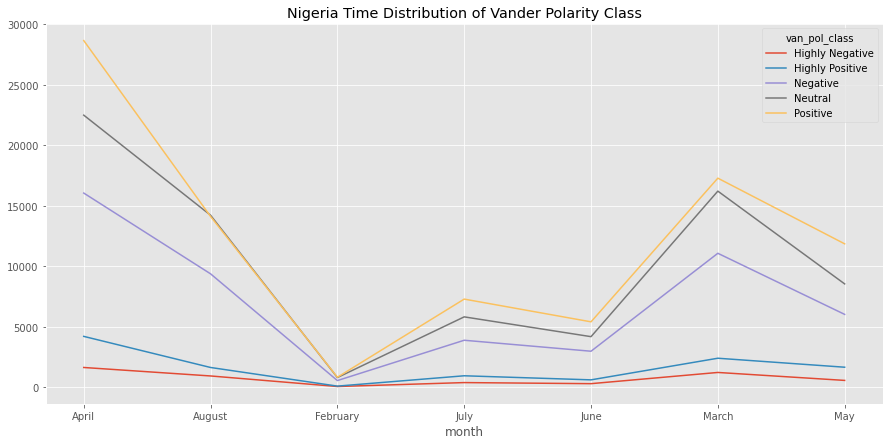

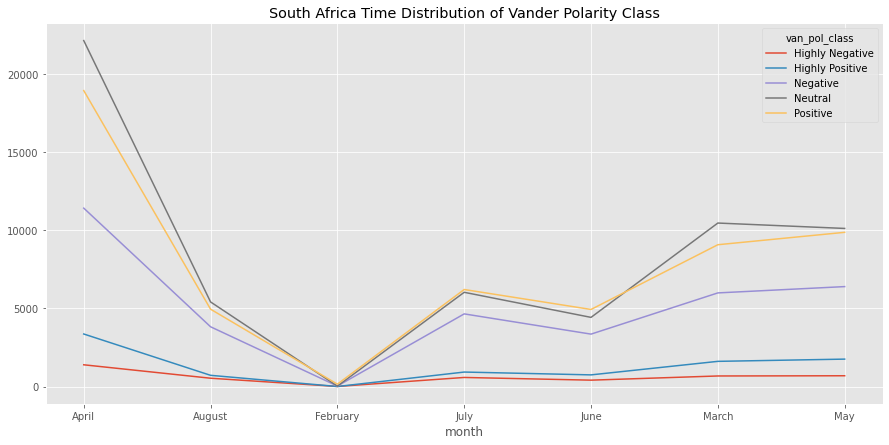

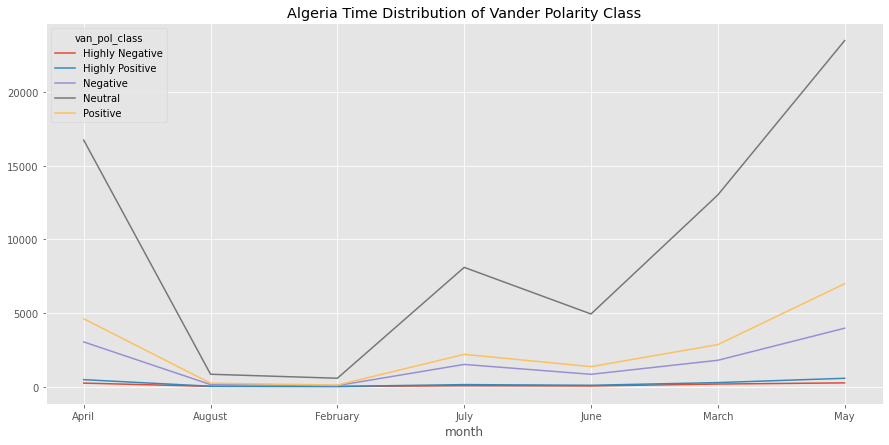

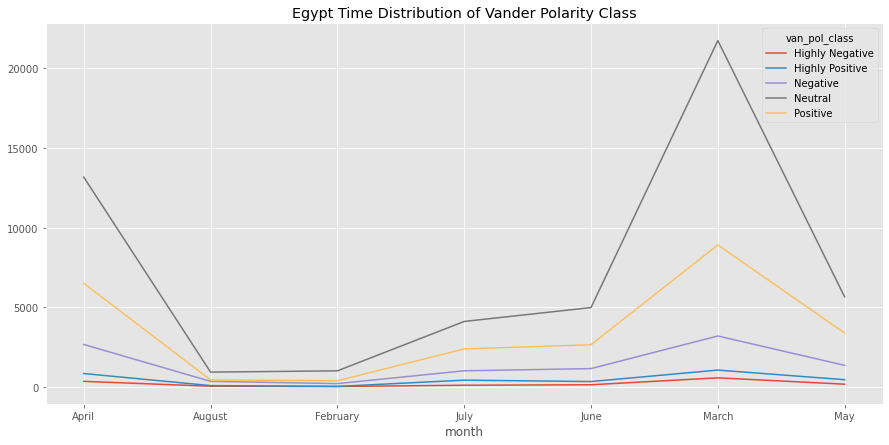

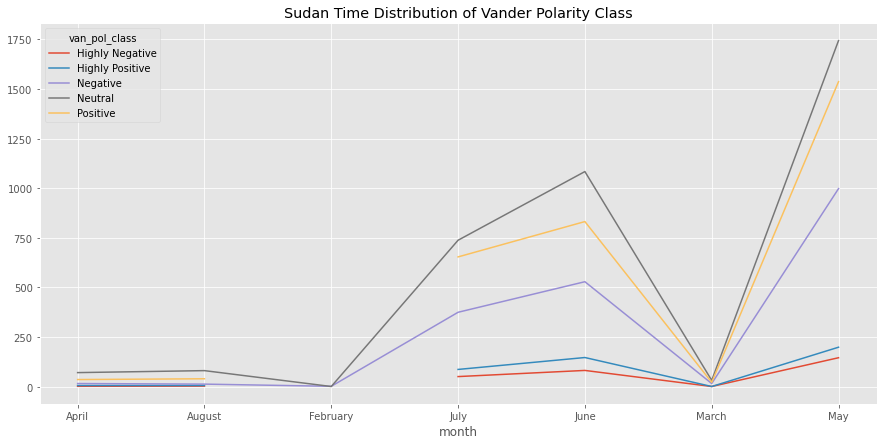

In [ ]:
states = data['country'].unique().tolist()
for state in states:
  #plot data
  
  fig, ax = plt.subplots(figsize=(15,7))
  ax.title.set_text('{} Time Distribution of Vander Polarity Class'.format(state))
  print('{} plot '.format(state))
  data[['month','van_pol_class']][data['country'] == state].groupby(['month'])['van_pol_class'].value_counts().unstack().plot(ax=ax)
  #data[['month','vander_polarity']][data['country'] == state].groupby(['month'])['vander_polarity'].mean().plot(ax=ax)

Distribution of each sentiment per Country

Neutral plot 
Highly Positive plot 
Positive plot 
Negative plot 
Highly Negative plot 


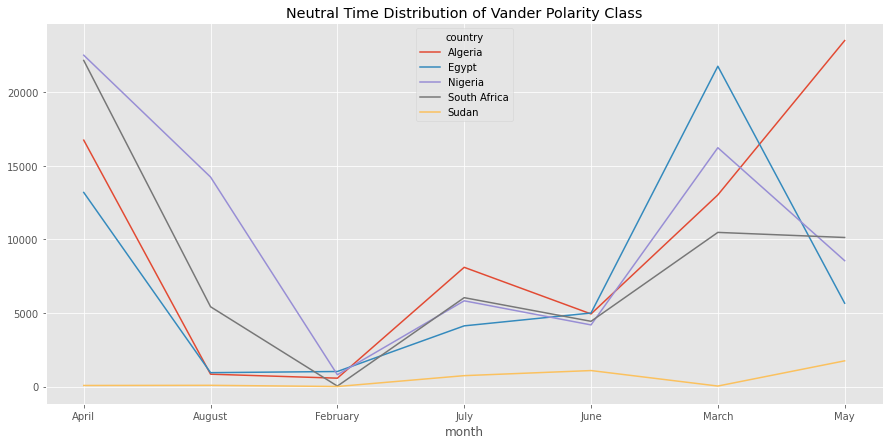

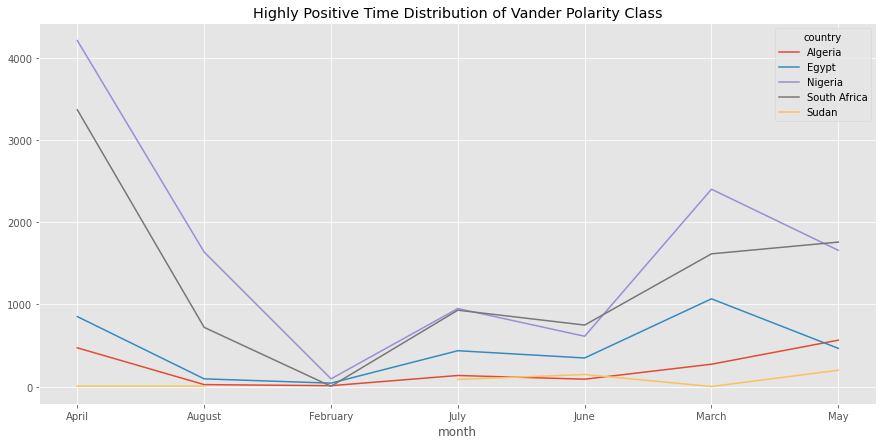

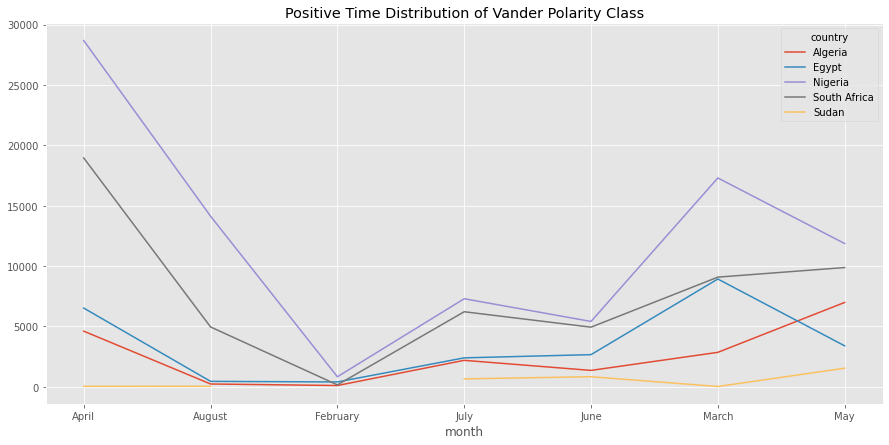

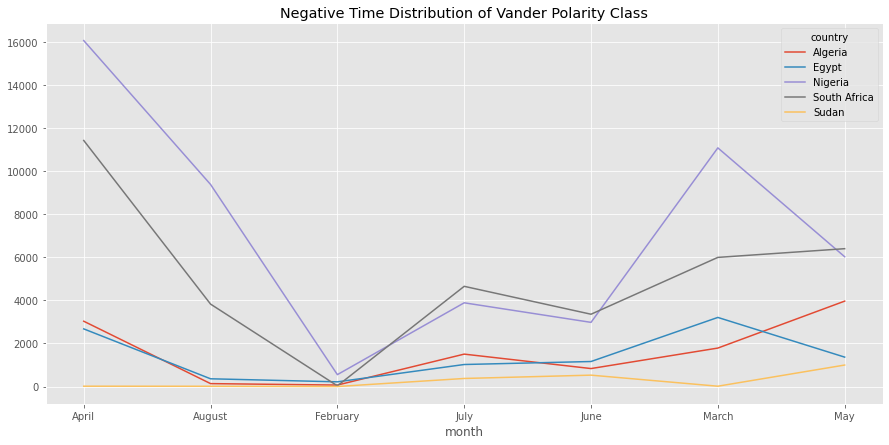

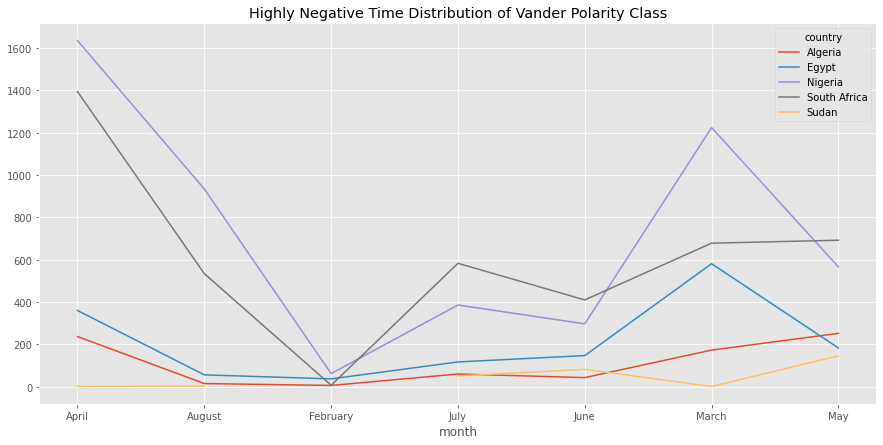

In [ ]:
states = data['van_pol_class'].unique().tolist()
for state in states:
  #plot data
  
  fig, ax = plt.subplots(figsize=(15,7))
  ax.title.set_text('{} Time Distribution of Vander Polarity Class'.format(state))
  print('{} plot '.format(state))
  #data[['month','van_pol_class']][data['country'] == state].groupby(['month'])['van_pol_class'].value_counts().unstack().plot(ax=ax)
  data[['month','country', 'van_pol_class']][data['van_pol_class'] == state].groupby(['month'])['country'].value_counts().unstack().plot(ax=ax)
  #data[['month','vander_polarity']][data['country'] == state].groupby(['month'])['vander_polarity'].mean().plot(ax=ax)

# Most Frequent Words

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot

Top Words per Sentiment Type

Neutral


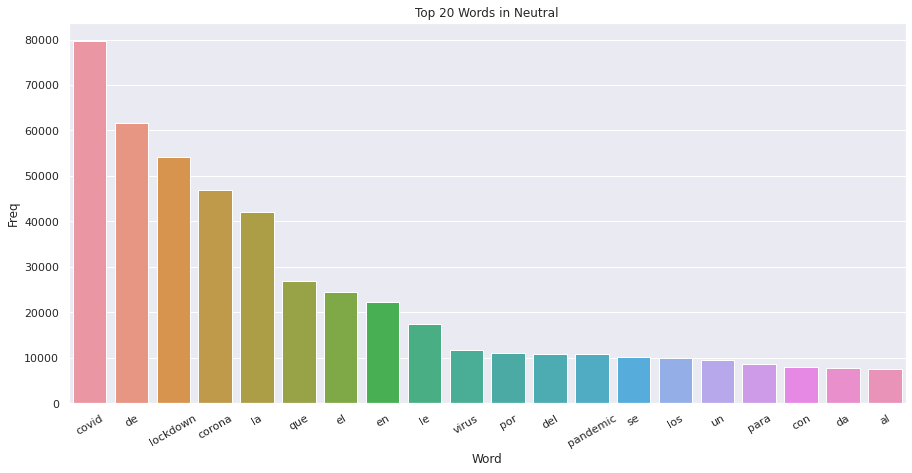

Highly Positive


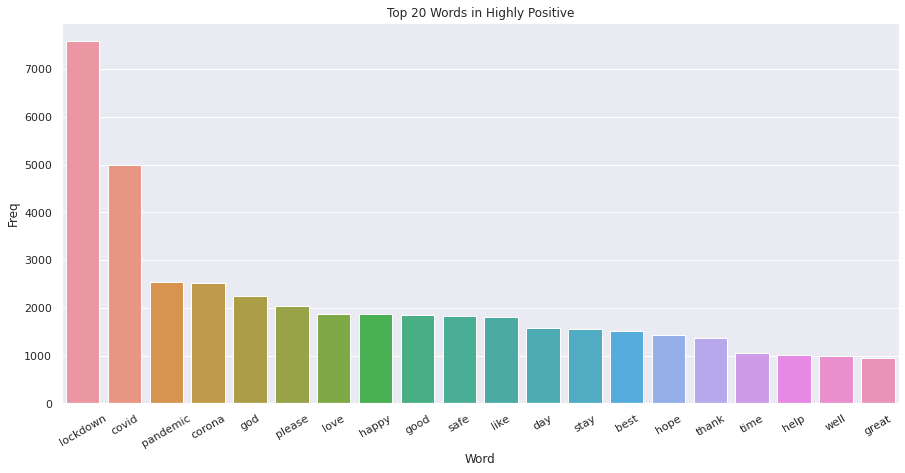

Positive


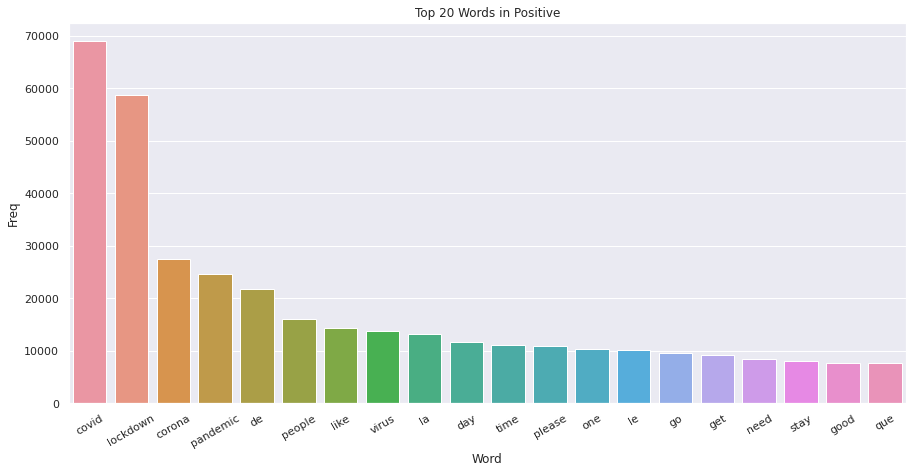

Negative


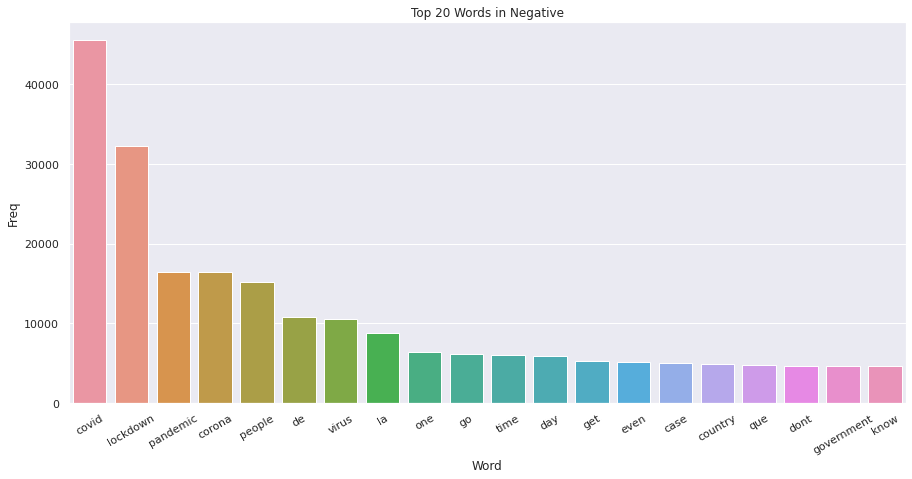

Highly Negative


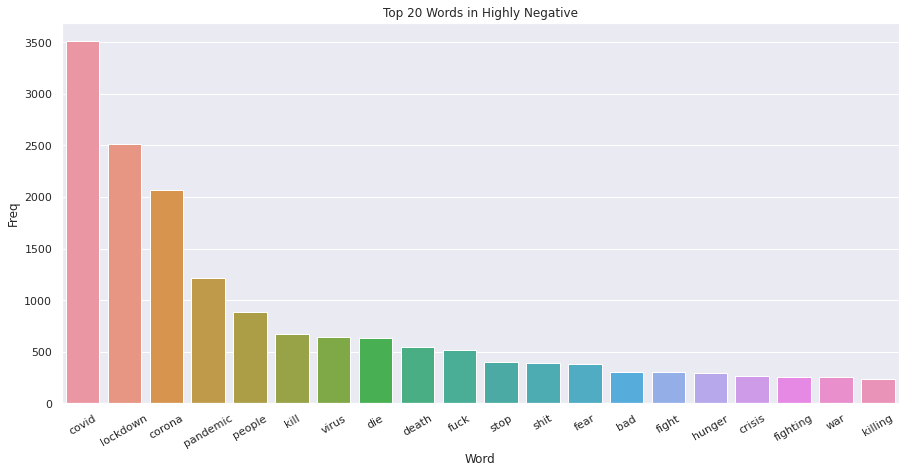

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cvp=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
neutral_corpus = []
hp_corpus = []
p_corpus = []
neg_corpus = []
hpneg_corpus = []
vanClass = data['van_pol_class'].unique().tolist()
for clas in vanClass:
  c = data[data['van_pol_class'] == clas]['preprocessed']
  ctemp = []
  for text in c:
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()

    #Lemmatisation
    lem = WordNetLemmatizer()
    
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    ctemp.append(text)
    if clas == 'Neutral':
      neutral_corpus.append(text)
    elif clas == 'Highly Positive':
      hp_corpus.append(text)
    elif clas == 'Positive':
      p_corpus.append(text)
    elif clas == 'Highly Negative':
      hpneg_corpus.append(text)
    elif clas == 'Negative':
      neg_corpus.append(text)
    else:
      print('class is {} '.format(clas))
  print(clas)
  top_words = get_top_n_words(ctemp, n=20)
  top_df = pd.DataFrame(top_words)
  top_df.columns=["Word", "Freq"]#Barplot of most freq words
  fig, ax = plt.subplots(figsize=(15,7))
  sns.set(rc={'figure.figsize':(13,8)})
  g = sns.barplot(x="Word", y="Freq", data=top_df)


  plt.title('Top 20 Words in {}'.format(clas))
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
  #plt.axis("off")
  plt.show()
#print(len(neutral_corpus))
#print(len(positive_corpus))
#print(len(negative_corpus))

  
 

## Top Words per Country

In [ ]:
vanClass = data['country'].unique().tolist()

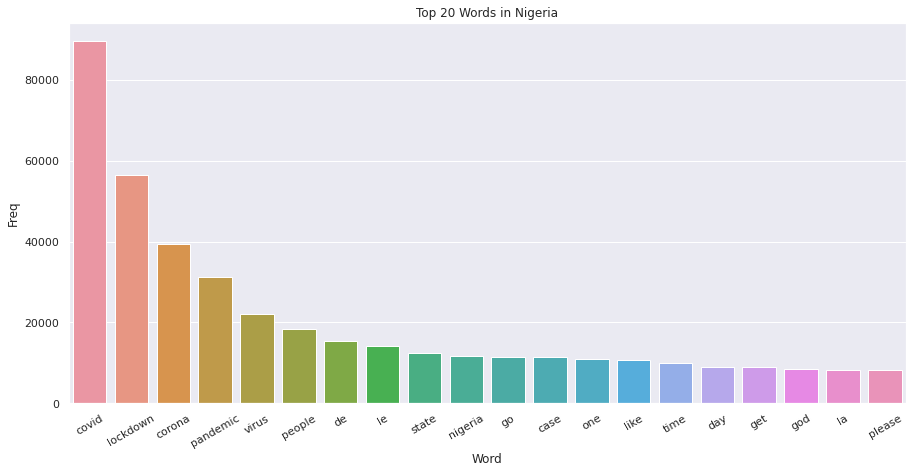

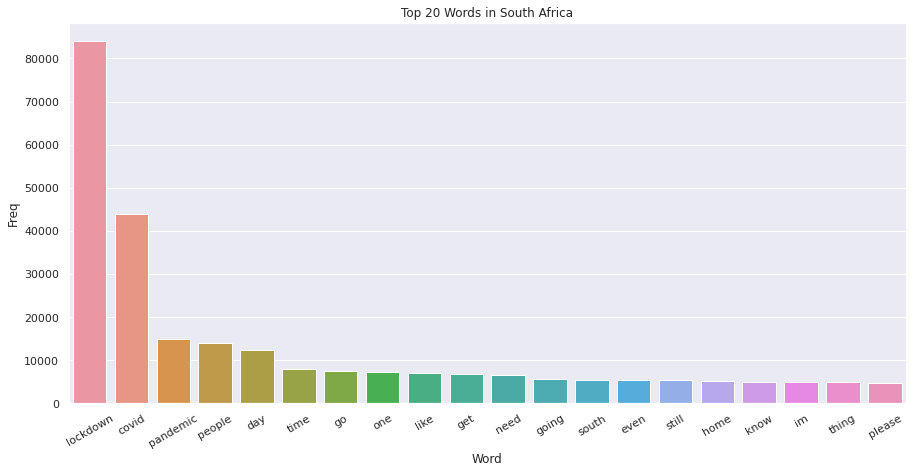

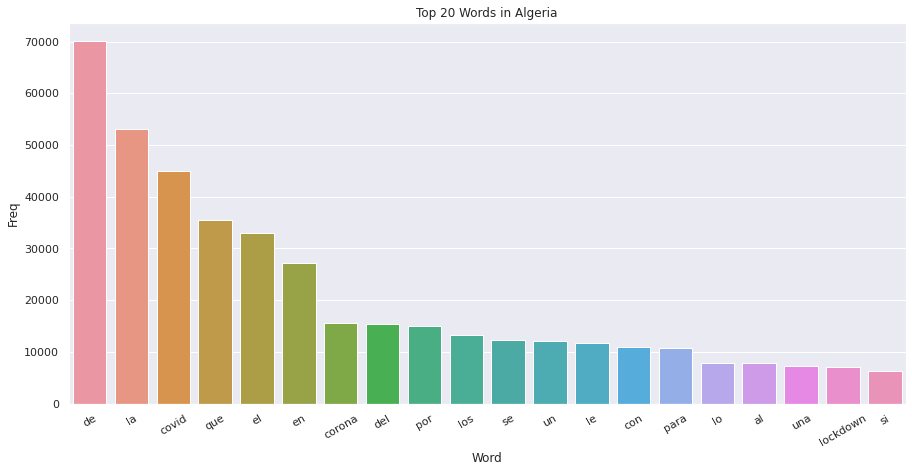

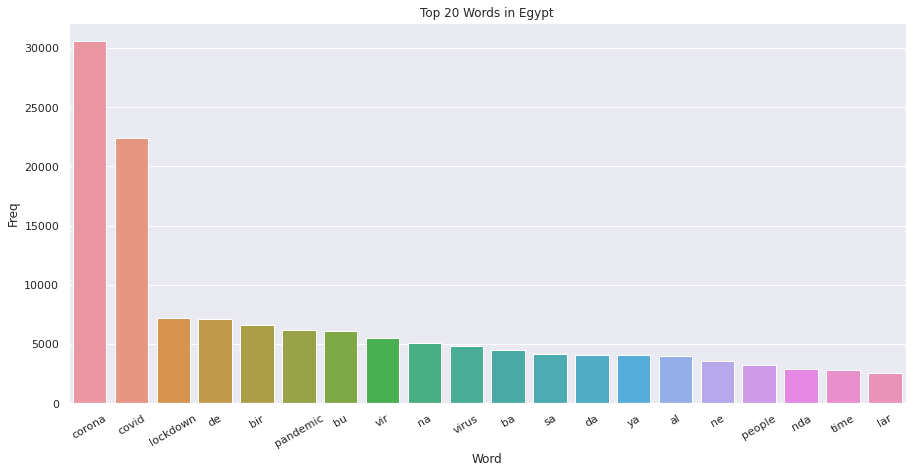

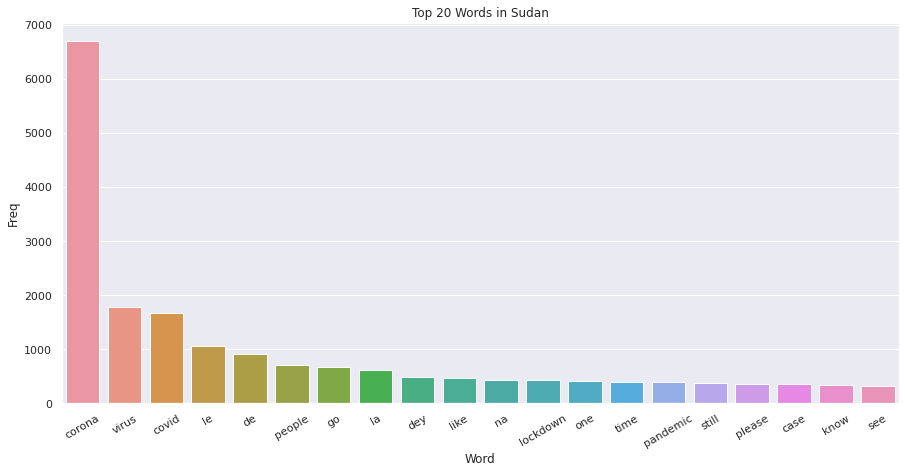

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cvp=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
neutral_corpus = []
hp_corpus = []
p_corpus = []
neg_corpus = []
hpneg_corpus = []
vanClass = data['country'].unique().tolist()
for clas in vanClass:
  c = data[data['country'] == clas]['preprocessed']
  ctemp = []
  for text in c:
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()

    #Lemmatisation
    lem = WordNetLemmatizer()
    
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    ctemp.append(text)
    
  top_words = get_top_n_words(ctemp, n=20)
  top_df = pd.DataFrame(top_words)
  top_df.columns=["Word", "Freq"]#Barplot of most freq words
  fig, ax = plt.subplots(figsize=(15,7))
  sns.set(rc={'figure.figsize':(13,8)})
  g = sns.barplot(x="Word", y="Freq", data=top_df)


  plt.title('Top 20 Words in {}'.format(clas))
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
  #plt.axis("off")
  plt.show()
#print(len(neutral_corpus))
#print(len(positive_corpus))
#print(len(negative_corpus))

  
 